In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#2
# URL to the Wheat Seeds Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Read the dataset from the URL using Pandas
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(df.head())


    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry coefficient  Length of kernel groove  Class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  


In [3]:
#3
# Select specific columns (Area, Perimeter, Compactness, and Class)
selected_columns = ['Area', 'Perimeter', 'Compactness', 'Class']
selected_data = df[selected_columns]

# Convert the selected data to a NumPy array
numpy_array = selected_data.to_numpy()

# Display the first few rows of the NumPy array
print(numpy_array[:5])


[[15.26   14.84    0.871   1.    ]
 [14.88   14.57    0.8811  1.    ]
 [14.29   14.09    0.905   1.    ]
 [13.84   13.94    0.8955  1.    ]
 [16.14   14.99    0.9034  1.    ]]


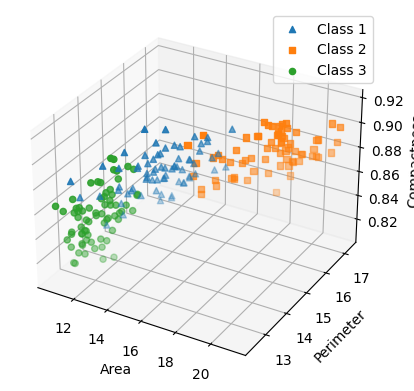

In [4]:
#4
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define markers for the three different classes
markers = ['^', 's', 'o']
class_labels = selected_data['Class'].unique()

# Plot data points with different shapes for each class
for i, class_label in enumerate(class_labels):
    class_data = numpy_array[numpy_array[:, -1] == class_label]
    ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], marker=markers[i], label=f'Class {int(class_label)}')

ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

plt.legend()
plt.show()


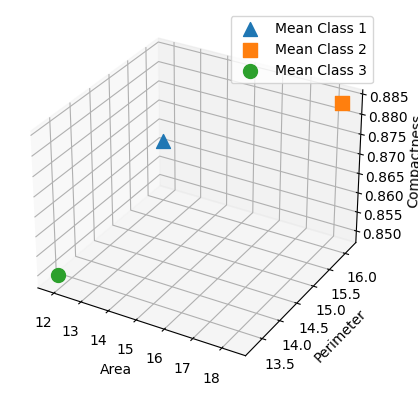

In [5]:
#5
# Calculate the mean data point for each class
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define markers for the three different classes
markers = ['^', 's', 'o']
class_labels = selected_data['Class'].unique()



# Calculate the mean data points for each class
mean = selected_data.groupby('Class').mean()

# Plot mean points with larger size
for i, class_label in enumerate(class_labels):
    mean_data = mean.loc[class_label]
    ax.scatter(mean_data[0], mean_data[1], mean_data[2], marker=markers[i], s=100, label=f'Mean Class {int(class_label)}')

ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')

plt.legend()
plt.show()


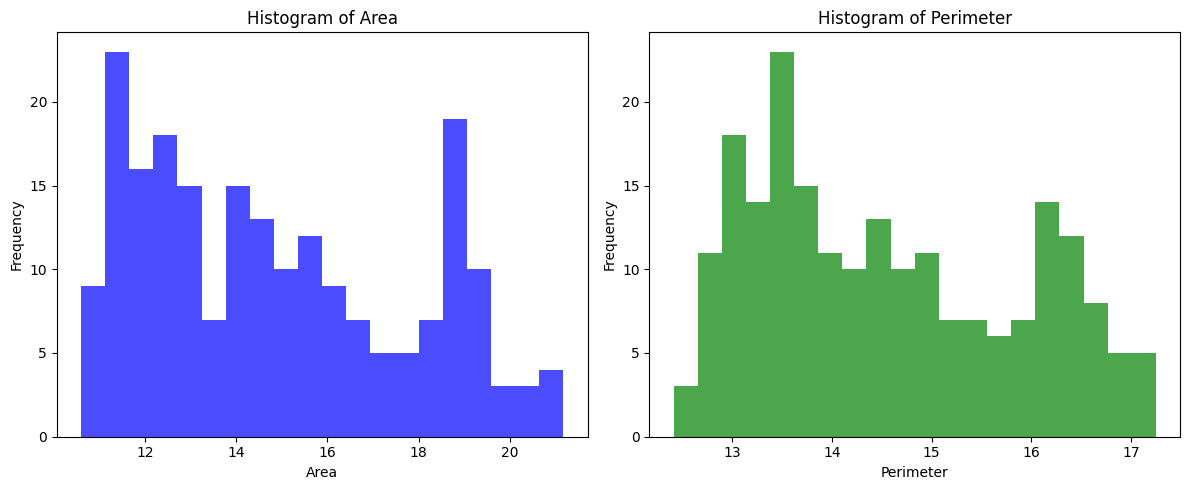

In [6]:
#6
# Create separate histograms for 'Area' and 'Perimeter'
plt.figure(figsize=(12, 5))

# Plot histogram for 'Area'
plt.subplot(1, 2, 1)
plt.hist(selected_data['Area'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histogram of Area')

# Plot histogram for 'Perimeter'
plt.subplot(1, 2, 2)
plt.hist(selected_data['Perimeter'], bins=20, color='green', alpha=0.7)
plt.xlabel('Perimeter')
plt.ylabel('Frequency')
plt.title('Histogram of Perimeter')

plt.tight_layout()
plt.show()

In [7]:
#7
# Calculate the standard deviation for 'Area' and 'Perimeter'
std_area = np.std(selected_data['Area'])
std_perimeter = np.std(selected_data['Perimeter'])

print(f'Standard Deviation (sigma) for Area: {std_area:.2f}')
print(f'Standard Deviation (sigma) for Perimeter: {std_perimeter:.2f}')


Standard Deviation (sigma) for Area: 2.90
Standard Deviation (sigma) for Perimeter: 1.30


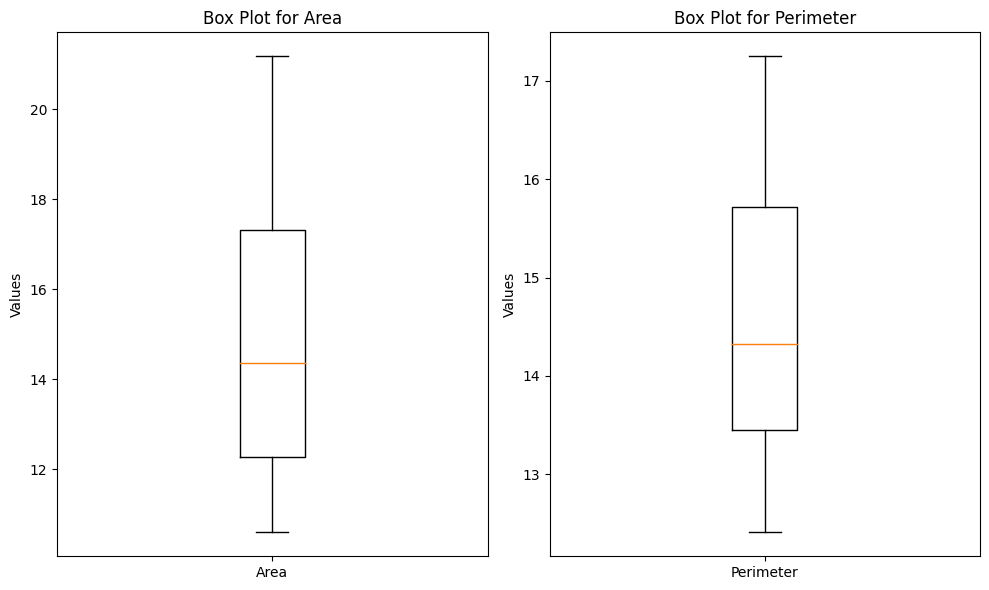

In [8]:
#8

# Create a figure for the box plots
plt.figure(figsize=(10, 6))

# Box Plot for 'Area' Dimension
plt.subplot(1, 2, 1)
plt.boxplot(selected_data['Area'])
plt.title('Box Plot for Area')
plt.xticks([1], ['Area'])
plt.ylabel('Values')

# Box Plot for 'Perimeter' Dimension
plt.subplot(1, 2, 2)
plt.boxplot(selected_data['Perimeter'])
plt.title('Box Plot for Perimeter')
plt.xticks([1], ['Perimeter'])
plt.ylabel('Values')

plt.tight_layout()
plt.show()


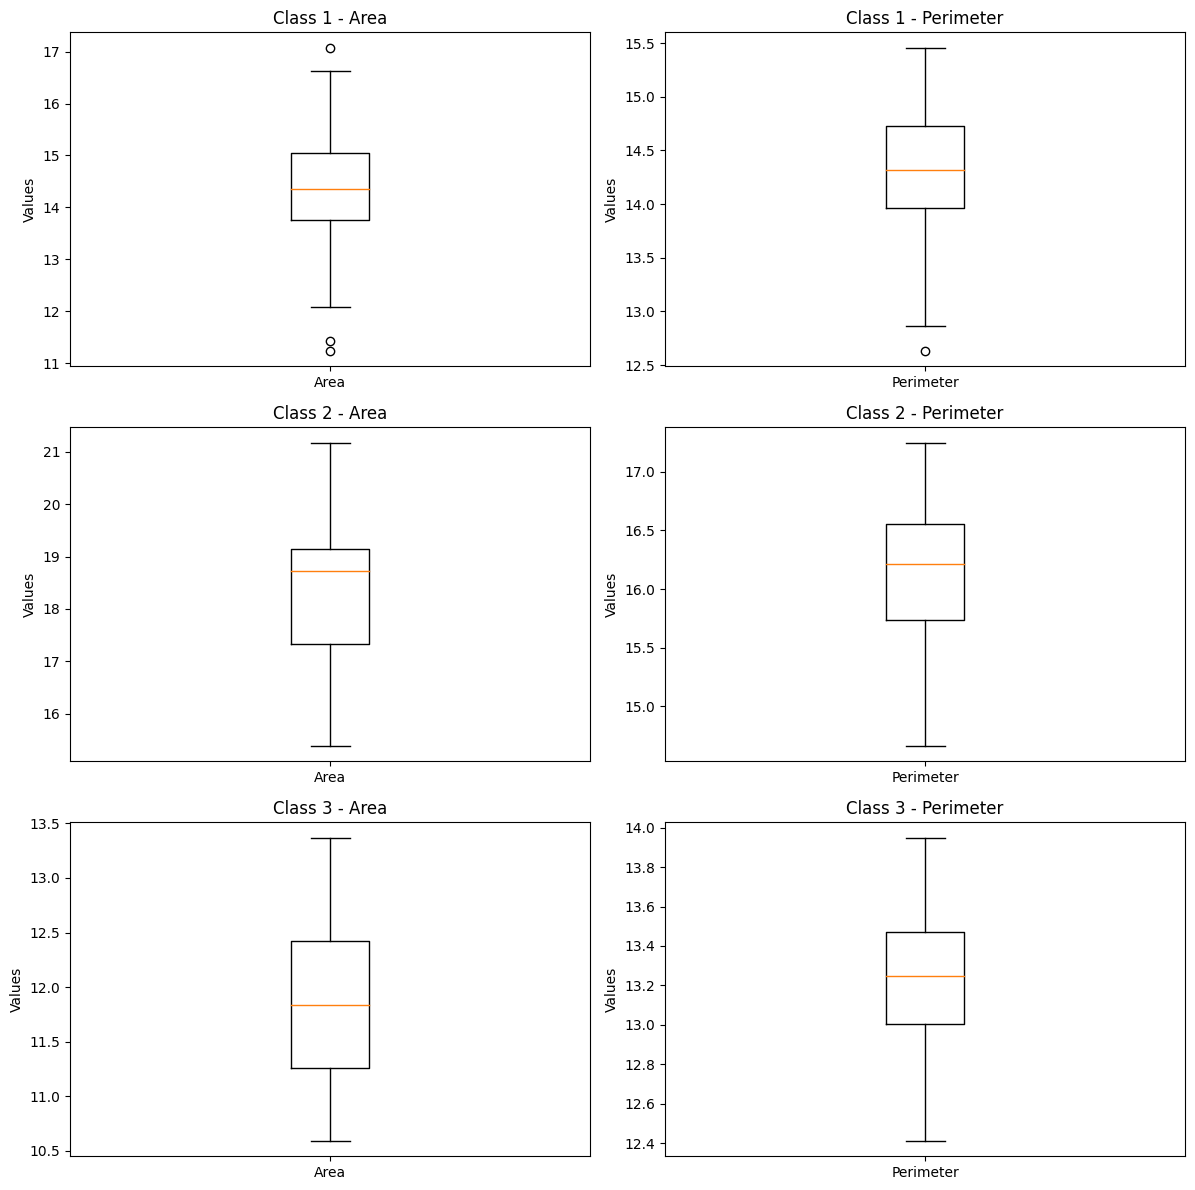

In [9]:
#9
import matplotlib.pyplot as plt

# Create a figure for the box plots with larger size
plt.figure(figsize=(18, 12))

# List of unique class labels
class_labels = selected_data['Class'].unique()

# Iterate through each class label and create a separate box plot
for i, class_label in enumerate(class_labels):
    class_data = selected_data[selected_data['Class'] == class_label]

    # Box Plot for 'Area' Dimension
    plt.subplot(3, 3, i*3 + 1)
    plt.boxplot(class_data['Area'])
    plt.title(f'Class {int(class_label)} - Area')
    plt.xticks([1], ['Area'])
    plt.ylabel('Values')

    # Box Plot for 'Perimeter' Dimension
    plt.subplot(3, 3, i*3 + 2)
    plt.boxplot(class_data['Perimeter'])
    plt.title(f'Class {int(class_label)} - Perimeter')
    plt.xticks([1], ['Perimeter'])
    plt.ylabel('Values')

# Adjust layout and show the larger plots
plt.tight_layout()
plt.show()


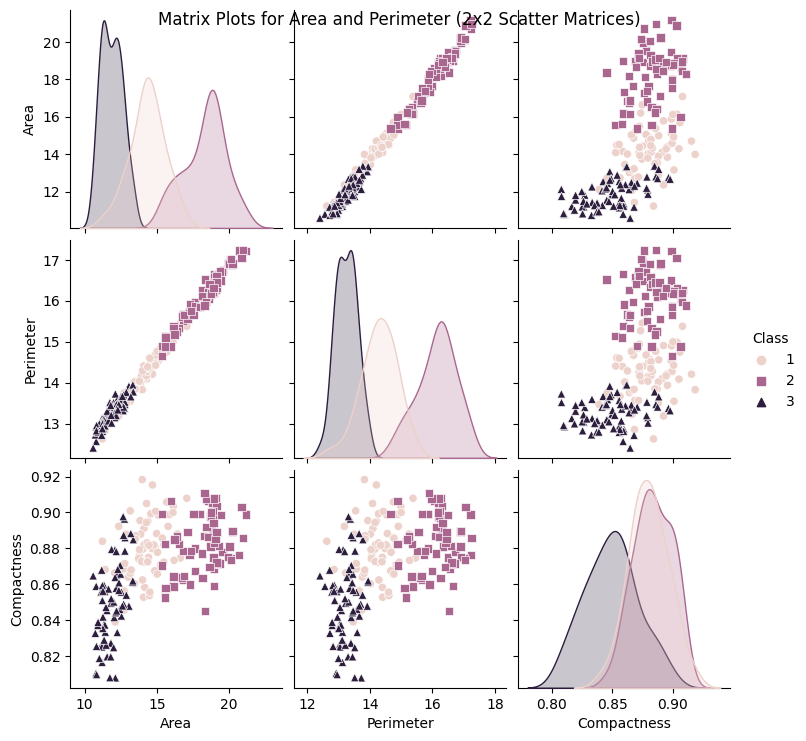

In [10]:
#10
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot for the selected data (Area and Perimeter dimensions)
sns.pairplot(selected_data, hue='Class', markers=['o', 's', '^'])
plt.suptitle("Matrix Plots for Area and Perimeter (2x2 Scatter Matrices)")
plt.show()


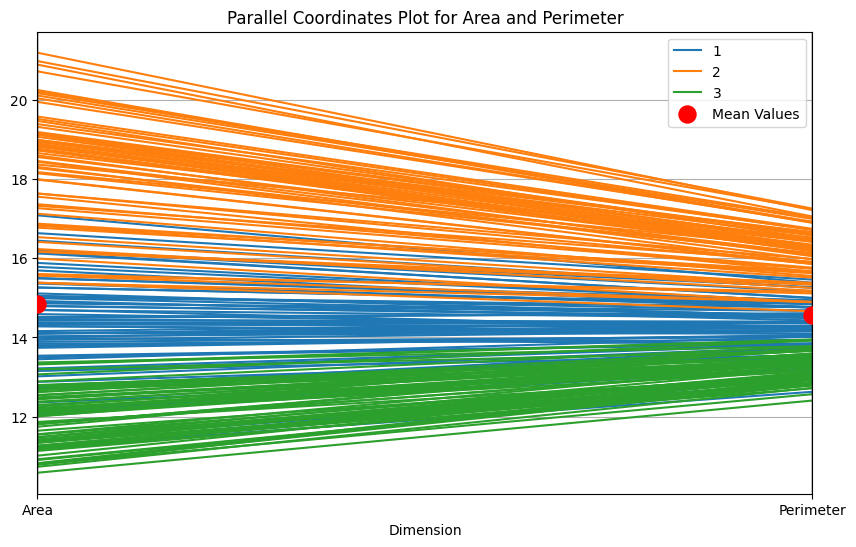

In [18]:

from pandas.plotting import parallel_coordinates

# Calculate the mean values for 'Area' and 'Perimeter'
mean_area = selected_data['Area'].mean()
mean_perimeter = selected_data['Perimeter'].mean()

# Create a parallel coordinates plot for 'Area' and 'Perimeter' dimensions
plt.figure(figsize=(10, 6))
parallel_coordinates(selected_data[['Area', 'Perimeter', 'Class']], 'Class', color=('#1f77b4', '#ff7f0e', '#2ca02c'))
plt.scatter([0, 1], [mean_area, mean_perimeter], c='red', marker='o', s=150, label='Mean Values', zorder=10)
plt.xticks(range(2), ['Area', 'Perimeter'])
plt.xlabel('Dimension')
plt.title('Parallel Coordinates Plot for Area and Perimeter')
plt.legend()
plt.show()
